In [7]:
import pandas as pd
from pathlib import Path
!pip install openpyxl
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#path to the excel file that we will use
unemployment_data_to_load = Path("demo-github/BLS Monthly Unemployment Rate.xlsx")

In [9]:
#reading our excel file into pandas
unemployment_data_raw = pd.read_excel(unemployment_data_to_load, engine='openpyxl')

In [10]:
#Run to see if we have access to our data
unemployment_data_raw.head()

,FIPS,State,Year,Month,Employable Population,Employed,Unemployed
0,1,Alabama,1976,1,1492409,1392154,100255
1,2,Alaska,1976,1,159154,147809,11345
2,4,Arizona,1976,1,972413,872738,99675
3,5,Arkansas,1976,1,882835,817756,65079
4,6,California,1976,1,9781720,8892663,889057


In [11]:
#calculation for unemployment rate based on the unemployed and employable population
unemployment_data_raw['Unemployment Rate'] = (unemployment_data_raw['Unemployed'] / unemployment_data_raw['Employable Population']) * 100

In [12]:
#confirming unemployment rate is in the dataframe
unemployment_data_raw.head()

,FIPS,State,Year,Month,Employable Population,Employed,Unemployed,Unemployment Rate
0,1,Alabama,1976,1,1492409,1392154,100255,6.717663
1,2,Alaska,1976,1,159154,147809,11345,7.128316
2,4,Arizona,1976,1,972413,872738,99675,10.250274
3,5,Arkansas,1976,1,882835,817756,65079,7.371593
4,6,California,1976,1,9781720,8892663,889057,9.088964


In [13]:
# extract total unemployed for the year
yearly_total_unemployed = unemployment_data_raw.groupby('Year')['Unemployed'].sum()

yearly_total_unemployed.head()

Year
1976    88314307
1977    83221063
1978    73859367
1979    73105365
1980    91708995
Name: Unemployed, dtype: int64

In [14]:
#extract yearly employable population
yearly_total_employable = unemployment_data_raw.groupby('Year')['Employable Population'].sum()
yearly_total_employable.head()

Year
1976    1153808800
1977    1188472224
1978    1227297561
1979    1260036193
1980    1283401445
Name: Employable Population, dtype: int64

In [15]:
#Calculation for yearly unemployment rate using total employable and unemployable population 
yearly_unemployment_rate = (yearly_total_unemployed / yearly_total_employable) * 100
yearly_unemployment_rate.head()

Year
1976    7.654154
1977    7.002357
1978    6.018049
1979    5.801846
1980    7.145776
dtype: float64

In [16]:
yearly_unemployment_df = pd.DataFrame({'Year': yearly_total_unemployed.index, 'Yearly Unemployment Rate': yearly_unemployment_rate})
yearly_unemployment_df.head()

,Year,Yearly Unemployment Rate
Year,,
1976,1976,7.654154
1977,1977,7.002357
1978,1978,6.018049
1979,1979,5.801846
1980,1980,7.145776


In [17]:
#Save unemployment dataframe to csv for analysis
yearly_unemployment_df.to_csv('unemployment_by_year.csv')

In [18]:
#Info on unemployment rate from 1976 to 2020 by year
yearly_unemployment_df["Yearly Unemployment Rate"].describe()

count    45.000000
mean      6.289151
std       1.629378
min       3.670575
25%       5.103873
50%       5.988235
75%       7.364066
max       9.685206
Name: Yearly Unemployment Rate, dtype: float64

In [19]:
#extracting total unemployed population by month
monthly_total_unemployed = unemployment_data_raw.groupby('Month')['Unemployed'].sum()
monthly_total_unemployed.head()

Month
1    372414137
2    372301056
3    373606152
4    389186712
5    387032615
Name: Unemployed, dtype: int64

In [20]:
#extracting total employable population by month
monthly_total_employable = unemployment_data_raw.groupby('Month')['Employable Population'].sum()
monthly_total_employable.head()

Month
1    6074346605
2    6079868511
3    6083758132
4    6083098640
5    6090831214
Name: Employable Population, dtype: int64

In [21]:
#Calculation for average monthly unemployment rate using total employable and total unemployable population 
monthly_unemployment_rate = (monthly_total_unemployed / monthly_total_employable) * 100
monthly_unemployment_rate

Month
1     6.130933
2     6.123505
3     6.141042
4     6.397837
5     6.354348
6     6.290210
7     6.258908
8     6.202657
9     6.183069
10    6.129201
11    6.122467
12    6.113306
dtype: float64

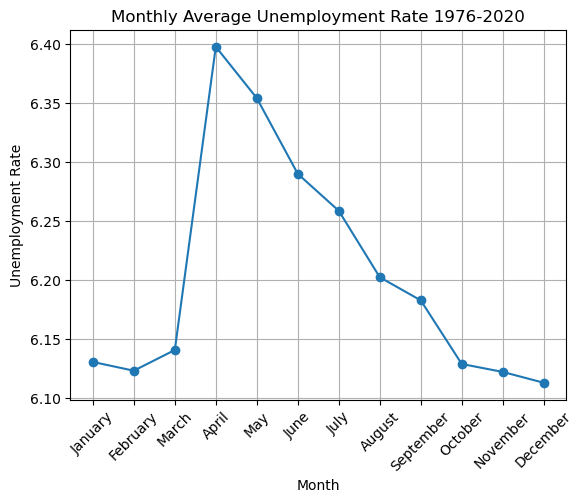

In [23]:
x_axis = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.plot(x_axis, monthly_unemployment_rate, marker = "o")

plt.xticks(x_axis, rotation=45)
#labels and title
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Average Unemployment Rate 1976-2020')
plt.grid(True)
plt.show()